In [1]:
from importlib import reload
import sys
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")
import urllib.request
from urllib.parse import quote
import re
from bs4 import BeautifulSoup
import jieba
import pandas as pd
import time

In [24]:
KEYWORDS = ['校园', '学校', '高中', '同学', '学生','中学', '老师', '高考', '十七岁', '十八岁']

In [3]:
URL = 'https://movie.douban.com/tag/'+quote('校园')+'%20'+quote('爱情')\
 +'%20'+quote('中国大陆')
    #+'%20'+quote('电视剧')
URLLIST1 = []
for i in range(0, 10):
    urli = URL + '?start={}&type=R'.format(str(i*20))
    URLLIST1.append(urli)
URLLIST2 = []
for i in range(10, 20):
    urli = URL + '?start={}&type=R'.format(str(i*20))
    URLLIST2.append(urli)
URLLIST3 = []
for i in range(20, 28):
    urli = URL + '?start={}&type=R'.format(str(i*20))
    URLLIST3.append(urli)

In [4]:
def get_html(url):
    my_headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:55.0)'}
    request = urllib.request.Request(url, headers = my_headers)
    result = urllib.request.urlopen(request)
    return result.read()

def get_tv_all(html):     #通过soup提取到每个电影的全部信息，以list返回
    soup = BeautifulSoup(html)
    tv_list = soup.find_all('div', class_='pl2')
    return tv_list

In [5]:



def one_tv_information(tv_url):

    '''
    Get vocabulary set, title words list, description words list,
        list of subsequences and course id of a course or sequence.
    Inputs: course_tag and the dictionary loaded from course_map
    Outputs: vocabulary set, title words list, description words list,
        list of subsequences and course id of a course or sequence.
    '''
    

    tv_html = get_html(tv_url)
    tv_soup = BeautifulSoup(tv_html, 'lxml')
    title = tv_soup.title.string
    title = title.strip()
    yr = tv_soup.find('span', class_='year')
    if yr: 
        yr = yr.text
        yr = int(yr.strip("()"))
    #intro = tv_soup.find('div', class_ = 'related-info')
    #desc = intro.find('span').text
    #desc = desc.strip()
    #desc_words = jieba.lcut(desc)
        return title, yr

In [6]:
def save_file(text, filename):
    f= open(filename,'w')
    f.write(text)
    f.close()

def read_file(filename):
    f = open(filename,'r')
    text = f.read()
    f.close()
    return text

In [115]:
html_list = []
for url in URLLIST: 
    time.sleep(2)
    html = get_html(url)
    html_list.append(html)

In [9]:
tv_list = []
for html in html_list: 
    tv_resultset = get_tv_all(html)
    tv_list.append(tv_resultset)

In [10]:
def get_one_tv_link(tvresult): 
    tv_url = tvresult.find('a').get('href')
    return tv_url
    

In [13]:
tv_link_list = []
for resultset in tv_list: 
    for tvresult in resultset: 
        tv_link = get_one_tv_link(tvresult)
        tv_link_list.append(tv_link)
        

In [26]:
results = []
for tv in tv_link_list: 
    result = one_tv_information(tv)
    results.append(result)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [33]:
parsDict = {'title':[], 'year':[]}
for result in results:
    parsDict['title'].append(result[0])
    parsDict['year'].append(result[1])


In [38]:
tvdf = pd.DataFrame(parsDict)
tvdf

,title,year
0,欢乐颂2 (豆瓣),2017
1,秘果 (豆瓣),2017
2,微微一笑很倾城 (豆瓣),2016
3,一起同过窗 第一季 (豆瓣),2016
4,致青春 (豆瓣),2016
5,我的朋友陈白露小姐 (豆瓣),2016
6,那年青春我们正好 (豆瓣),2016
7,最好的我们 (豆瓣),2016
8,十五年等待候鸟 (豆瓣),2016
9,笨蛋爱上两个你 (豆瓣),2016


In [39]:
tvdf.year.value_counts()

2014    15
2011    13
2010    13
2007    12
2012    11
2006    10
2016    10
2015    10
2013     9
2004     7
2001     6
2003     5
1999     4
2008     4
2005     3
2002     3
2017     2
1996     2
2000     2
2009     2
1998     2
2019     1
1997     1
1988     1
Name: year, dtype: int64

In [102]:
tvdf.to_csv('tvdata')

In [93]:
len(tv_link_list2)

523

In [7]:
html_list1 = []
for url in URLLIST1: 
    time.sleep(2)
    html = get_html(url)
    html_list1.append(html)

html_list2 = []
for url in URLLIST2: 
    time.sleep(2)
    html = get_html(url)
    html_list2.append(html)

html_list3 = []
for url in URLLIST3: 
    time.sleep(2)
    html = get_html(url)
    html_list3.append(html)

In [8]:
tvmovie_list1 = []
for html in html_list1: 
    tv_resultset = get_tv_all(html)
    tvmovie_list1.append(tv_resultset)

tvmovie_list2 = []
for html in html_list2: 
    tv_resultset = get_tv_all(html)
    tvmovie_list2.append(tv_resultset)

tvmovie_list3 = []
for html in html_list3: 
    tv_resultset = get_tv_all(html)
    tvmovie_list3.append(tv_resultset)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [ ]:
tvmovie_link_list1 = []
for resultset in tvmovie_list1: 
    for tvresult in resultset: 
        tv_link = get_one_tv_link(tvresult)
        tvmovie_link_list1.append(tv_link)
tvmovie_link_list2 = []
for resultset in tvmovie_list2: 
    for tvresult in resultset: 
        tv_link = get_one_tv_link(tvresult)
        tvmovie_link_list2.append(tv_link)

In [16]:
tvmovie_link_list3 = []
for resultset in tvmovie_list3: 
    for tvresult in resultset: 
        tv_link = get_one_tv_link(tvresult)
        tvmovie_link_list3.append(tv_link)

In [13]:
tvmovie_results1 = []
for tv in tvmovie_link_list1: 
    time.sleep(2)
    result = one_tv_information(tv)
    tvmovie_results1.append(result)

In [14]:
tvmovie_results2 = []
for tv in tvmovie_link_list2: 
    time.sleep(2)
    result = one_tv_information(tv)
    tvmovie_results2.append(result)

In [32]:
tvmovie_results4 = []
for tv in tvmovie_link_list3: 
    time.sleep(2)
    result = one_tv_information(tv)
    tvmovie_results4.append(result)

In [33]:
tvmovie_results3 = tvmovie_results4

In [34]:
len(tvmovie_results3)

141

In [122]:
len(tvmovie_link_list)

523

In [36]:
tvmovieDict = {'title':[], 'year':[]}
for result in tvmovie_results1:
    if (result):
        tvmovieDict['title'].append(result[0])
        tvmovieDict['year'].append(result[1])
for result in tvmovie_results2:
    if (result):
        tvmovieDict['title'].append(result[0])
        tvmovieDict['year'].append(result[1])
for result in tvmovie_results3:
    if (result):
        tvmovieDict['title'].append(result[0])
        tvmovieDict['year'].append(result[1])

In [37]:
tvmovie_df = pd.DataFrame(tvmovieDict)
tvmovie_by_yr = tvmovie_df.year.value_counts().to_frame()


In [39]:
tvmovie_by_yr.to_csv('tvmovie_by_yr.csv')

In [38]:
tvmovie_by_yr

,year
2013,59
2014,57
2015,53
2011,46
2016,40
2012,37
2010,37
2006,21
2007,20
2008,17


In [11]:
tvmovie_by_yr = tvmoviedf.year.value_counts().to_frame()
yr_order = tvmovie_by_yr.sort_index(axis = 0)

In [12]:
yr9516_order = yr_order.loc[1995: 2016, : ]
yr9516_order

,year
1995,2
1996,2
1997,2
1998,2
1999,6
2000,6
2001,12
2002,15
2003,10
2004,15


<IPython.core.display.Javascript object>


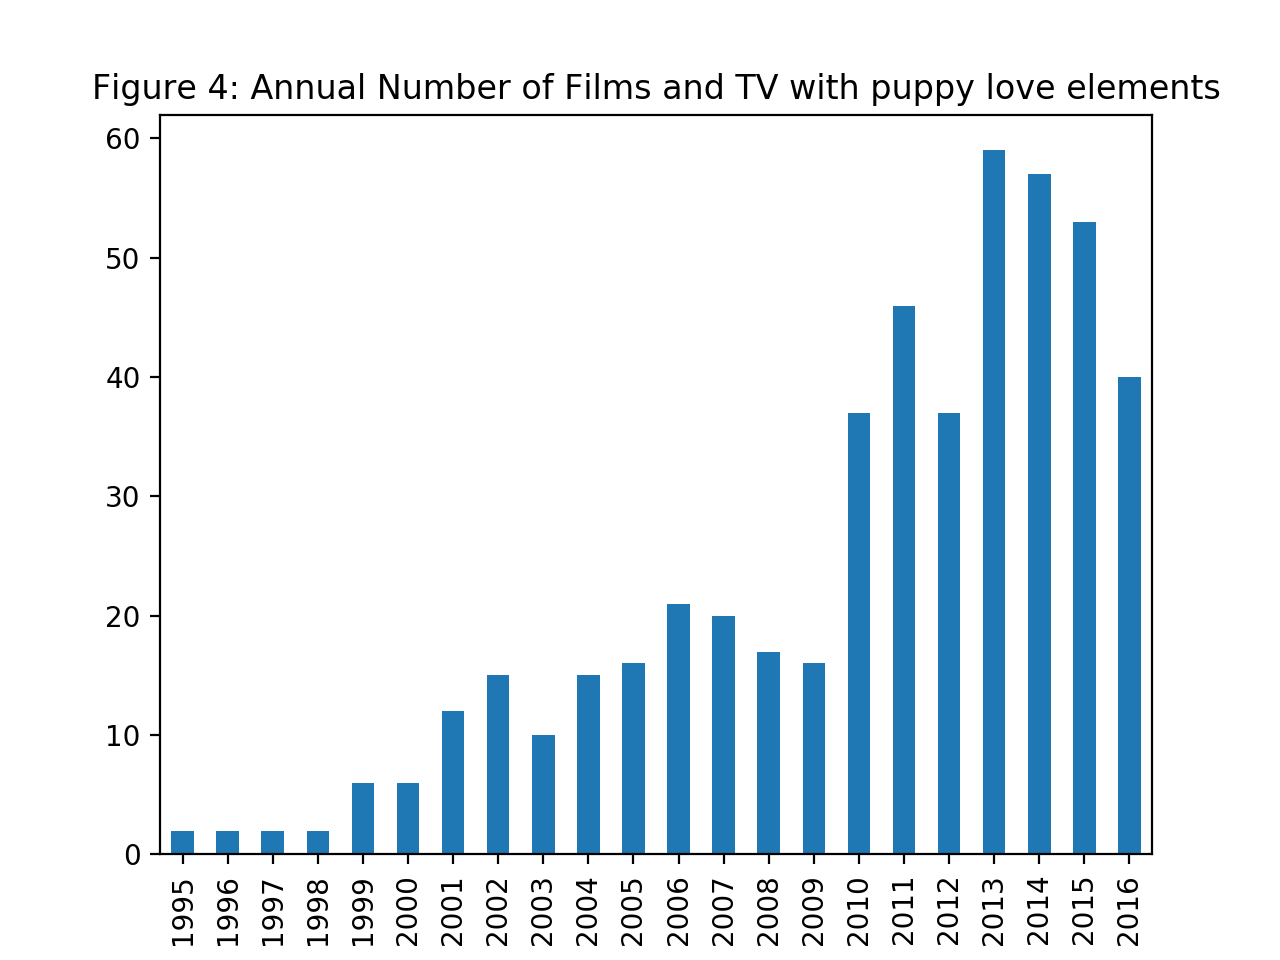

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
yr9516_order.plot.bar(title = "Figure 4: Annual Number of Films and TV with puppy love elements", 
                     legend = False)
plt.xlabel = 'year'
plt.ylabel = 'Number of Films and TV'
plt.show()

In [71]:
tvmovie_df.to_csv('tvmoviedata.csv')

In [10]:
import pandas as pd
yr_order = pd.read_csv('tvmovie_by_yr.csv')
yr9516_order = yr_order.loc[1995: 2016, : ]
yr9516_order

,year,Num_Videos


In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
yr9516_order.plot.bar(title = "Figure 4: Annual Number of Films and TV with puppy love elements", 
                     legend = False)
plt.xlabel = 'year'
plt.ylabel = 'Number of Films and TV'
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot